# TensorFlow Estimator API

Let's explore the Estimator API from TensorFlow. The tf.estimator API has several model types to choose from.
Here are the Estimator Types:
#### tf.estimator.LinearClassifier : Constructs a linear classification model.
#### tf.estimator.LinearRegressor : Constructs a linear regression model.
#### tf.estimator.DNNClassifier : Constructs a neural network classification model
#### tf.estimator.DNNRegressor : Constructs a neural network regression model
#### tf.estimator.DNNLinearCombinedRegressor : Construct a neural network and linear combined regression model.

In general, to use the Estimator API we do the following:
#### Define a list of feature columns -> Create the Estimator Model -> Create a Data Input Function -> Call train,evaluate, and predict methods on the estimator object.


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_data = np.linspace(0.0,10,1000000)
noise = np.random.randn(len(x_data))
y_true = (0.5)*x_data + 5 + noise 

In [4]:
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

In [36]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y'])
my_data = pd.concat([x_df,y_df],axis=1)
my_data.head()

,X Data,Y
0,0.00000,3.638672
1,0.00001,4.030592
2,0.00002,3.963493
3,0.00003,4.818780
4,0.00004,5.197009


In [11]:
feat_cols = [ tf.feature_column.numeric_column('x',shape=[1])]

In [12]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\VINITJ~1\\AppData\\Local\\Temp\\tmpd4zlic1g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000021F7A64AEF0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [16]:
print(x_train.shape)
print(x_eval.shape)

(700000,)
(300000,)


In [17]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs= None,shuffle=True)

In [18]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs= 1000,shuffle=False)

In [19]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs= 1000,shuffle=False)

In [20]:
estimator.train(input_fn = input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\VINITJ~1\AppData\Local\Temp\tmpd4zlic1g\model.ckpt.
INFO:tensorflow:loss = 455.11, step = 1
INFO:tensorflow:global_step/sec: 289.871
INFO:tensorflow:loss = 14.2045, step = 101 (0.352 sec)
INFO:tensorflow:global_step/sec: 350.881
INFO:tensorflow:loss = 19.4962, step = 201 (0.300 sec)
INFO:tensorflow:global_step/sec: 125.78
INFO:tensorflow:loss = 4.61033, step = 301 (0.776 sec)
INFO:tensorflow:global_step/sec: 319.476
INFO:tensorflow:loss = 13.4285, step = 401 (0.312 sec)
INFO:tensorflow:global_step/sec: 337.858
INFO:tensorflow:loss = 8.70343, step = 501 (0.296 sec)
INFO:tensorflow:global_step/sec: 362.325
INFO:tensorflow:loss = 11.1328, step = 601 (0.279 sec)
INFO:tensorflow:global_step/sec: 321.55
I

In [22]:
train_metrics = estimator.evaluate(input_fn = train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-14-16:18:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\VINITJ~1\AppData\Local\Temp\tmpd4zlic1g\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-14-16:18:58
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.09085, global_step = 1000, loss = 8.72679


In [23]:
eval_metrics = estimator.evaluate(input_fn = eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-14-16:19:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\VINITJ~1\AppData\Local\Temp\tmpd4zlic1g\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-14-16:19:54
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.10667, global_step = 1000, loss = 8.85336


In [25]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.0908492, 'loss': 8.7267933, 'global_step': 1000}


In [27]:
print('EVAL METRICS')
print(eval_metrics)

EVAL METRICS
{'average_loss': 1.1066695, 'loss': 8.8533564, 'global_step': 1000}


In [29]:
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data},shuffle=False)

In [31]:
list(estimator.predict(input_fn = input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\VINITJ~1\AppData\Local\Temp\tmpd4zlic1g\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([ 4.39695692], dtype=float32)},
 {'predictions': array([ 5.03843069], dtype=float32)},
 {'predictions': array([ 5.67990494], dtype=float32)},
 {'predictions': array([ 6.32137871], dtype=float32)},
 {'predictions': array([ 6.96285248], dtype=float32)},
 {'predictions': array([ 7.60432625], dtype=float32)},
 {'predictions': array([ 8.24580002], dtype=float32)},
 {'predictions': array([ 8.88727379], dtype=float32)},
 {'predictions': array([ 9.52874851], dtype=float32)},
 {'predictions': array([ 10.17022228], dtype=float32)}]

In [32]:
predictions = []
for pred in estimator.predict(input_fn = input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\VINITJ~1\AppData\Local\Temp\tmpd4zlic1g\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [33]:
predictions

[array([ 4.39695692], dtype=float32),
 array([ 5.03843069], dtype=float32),
 array([ 5.67990494], dtype=float32),
 array([ 6.32137871], dtype=float32),
 array([ 6.96285248], dtype=float32),
 array([ 7.60432625], dtype=float32),
 array([ 8.24580002], dtype=float32),
 array([ 8.88727379], dtype=float32),
 array([ 9.52874851], dtype=float32),
 array([ 10.17022228], dtype=float32)]

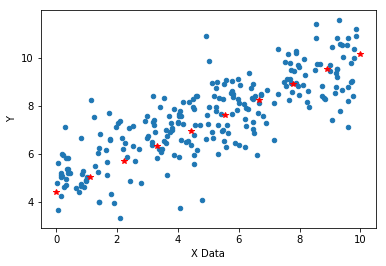

In [39]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y = 'Y')
plt.plot(brand_new_data,predictions,'r*')